### 导入相关模块

 - NumPy version: 2.2.2
    - pip install numpy==2.2.2
 - Pandas version: 2.2.3
    - pip install pandas==2.2.3
 - Matplotlib version: 3.10.1
    - pip install matplotlib==3.10.1

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df = pd.read_excel("深圳市海关进出口2022~2024.xlsx")

In [40]:
df.head() # 展示前位数据

,时间,总值额（亿元人民币）,进口（亿元人民币）,出口（亿元人民币）
0,2021-01-01,5122.1,3546.4,1575.7
1,2021-02-01,3845.0,2621.0,1224.0
2,2021-03-01,4685.1,2995.1,1690.0
3,2021-04-01,5118.0,3313.4,1804.6
4,2021-05-01,4894.8,3226.6,1668.2


In [41]:
df.tail() # 展示末位数据

,时间,总值额（亿元人民币）,进口（亿元人民币）,出口（亿元人民币）
43,2024-08-01,5520.4,3620.3,1900.1
44,2024-09-01,5948.3,3951.6,1996.7
45,2024-10-01,5671.2,3730.3,1940.9
46,2024-11-01,5720.6,3896.9,1823.7
47,2024-12-01,6616.4,4384.7,2231.7


In [42]:
# 重新定义列索引
df.columns=["Time", 'Total', "Input", 'Output']
df = df.drop(columns=['Input', 'Output']) # 先只看进出口总值
df.head()

,Time,Total
0,2021-01-01,5122.1
1,2021-02-01,3845.0
2,2021-03-01,4685.1
3,2021-04-01,5118.0
4,2021-05-01,4894.8


In [43]:
# 转化时间为时间数据类型
df['Time']=pd.to_datetime(df['Time'])
df.head()

,Time,Total
0,2021-01-01,5122.1
1,2021-02-01,3845.0
2,2021-03-01,4685.1
3,2021-04-01,5118.0
4,2021-05-01,4894.8


In [44]:
# 设置时间索引
df.set_index('Time',inplace=True)
df.head()

,Total
Time,
2021-01-01,5122.1
2021-02-01,3845.0
2021-03-01,4685.1
2021-04-01,5118.0
2021-05-01,4894.8


In [45]:
# 分析数据组的特点
df.describe()

,Total
count,48.000000
mean,5383.506250
std,721.927552
min,3381.300000
25%,5121.075000
50%,5514.950000
75%,5793.225000
max,6809.000000


<Axes: xlabel='Time'>

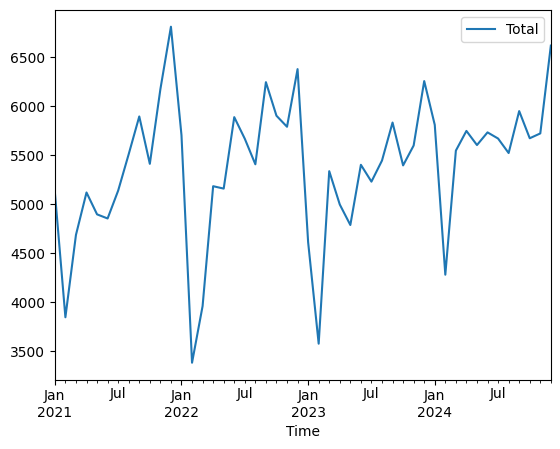

In [46]:
df.plot()

In [47]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df['Total'])

In [48]:
# 定义ADF检验函数
def adfuller_test(sales):
    # 执行ADF检验
    result = adfuller(sales)
    # 定义检验结果的标签
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    # 打印检验结果
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    # 根据p值判断时间序列是否平稳
    if result[1] <= 0.05:
        # 如果p值小于或等于0.05，拒绝原假设，时间序列是平稳的
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        # 如果p值大于0.05，不能拒绝原假设，时间序列是非平稳的
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")